In [2]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split

In [3]:
n=100000
lb=0
ub=1
delta_x=(ub-lb)/n
x=np.linspace(lb,ub,n)
training_set=10+np.sin(100*x)*x**2+2*x

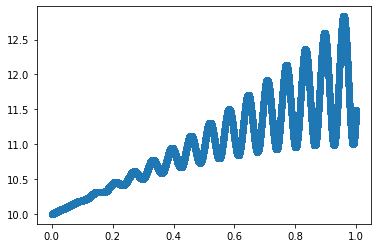

In [4]:
plt.scatter(x,training_set)

In [5]:
# Scaled to work with Neural networks.
training_set_scaled = (training_set-np.min(training_set))/(np.max(training_set)-np.min(training_set))

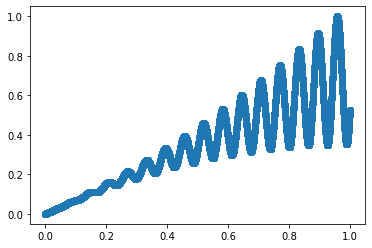

In [6]:
plt.scatter(x,training_set_scaled)

In [7]:
X_train = []
y_train = []
s=5
for i in range(s,n):
    X_train.append(training_set_scaled[i-s:i])
    y_train.append(training_set_scaled[i])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train.shape

(99995, 5)

In [9]:
def SimpleRNN_model(input_):
    print('encoder')
    print(input_.shape)
    x = SimpleRNN(128,input_shape=(30,1))(input_)
    print(x.shape)
    output = Dense(1)(x)
    print(output.shape)
    return output

In [10]:
input_ = tensorflow.keras.Input(shape=(s,1))
SimpleRNN_model = tensorflow.keras.Model(input_, SimpleRNN_model(input_))

encoder
(None, 5, 1)
(None, 128)
(None, 1)


In [11]:
opt = tensorflow.keras.optimizers.Adam()
SimpleRNN_model.compile(optimizer=opt, loss='mse')
SimpleRNN_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               16640     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [12]:
epochs=5
SimpleRNN_model.fit(X_train.reshape(len(X_train),s,1),y_train,epochs=epochs,batch_size=128)

Epoch 1/5
782/782 [==============================] - 2s 2ms/step - loss: 0.0040
Epoch 2/5
782/782 [==============================] - 2s 2ms/step - loss: 9.7538e-06
Epoch 3/5
782/782 [==============================] - 2s 2ms/step - loss: 1.1581e-06
Epoch 4/5
782/782 [==============================] - 2s 2ms/step - loss: 2.2153e-07
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 3.4765e-06


In [13]:
X_train[-1]

array([0.52525882, 0.52556557, 0.52587252, 0.52617966, 0.526487  ])

In [14]:
y_train_pred=SimpleRNN_model.predict(X_train)

In [15]:
y_train_pred.shape

(99995, 1)

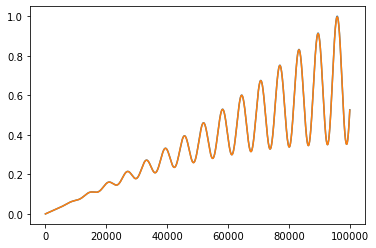

In [16]:
plt.plot(np.linspace(0,len(training_set_scaled),len(training_set_scaled)),training_set_scaled)
plt.plot(np.linspace(s,len(training_set_scaled),len(training_set_scaled)-s),y_train_pred)

In [17]:
m=100000
tp=delta_x*m
x=np.linspace(ub,ub+tp,m)
testing_set=10+np.sin(100*x)*x**2+2*x

In [18]:
# Scaled to work with Neural networks.
testing_set_scaled = (testing_set-np.min(training_set))/(np.max(training_set)-np.min(training_set))

In [19]:
X_test = []
y_test = []
s=5
for i in range(s,m):
    X_test.append(testing_set_scaled[i-s:i])
    y_test.append(testing_set_scaled[i])
X_test, y_test = np.array(X_test), np.array(y_test)

In [20]:
y_test_pred=SimpleRNN_model.predict(X_test)

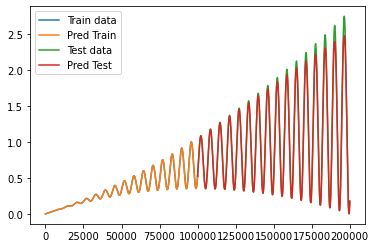

In [21]:
plt.plot(np.linspace(0,len(training_set_scaled),len(training_set_scaled)),training_set_scaled,label='Train data')
plt.plot(np.linspace(s,len(training_set_scaled),len(training_set_scaled)-s),y_train_pred,label='Pred Train')
plt.plot(np.linspace(n,n+len(testing_set_scaled),len(testing_set_scaled)),testing_set_scaled, label='Test data')
plt.plot(np.linspace(n+s,n+len(testing_set_scaled),len(testing_set_scaled)-s),y_test_pred,label='Pred Test')
plt.legend()